In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format)
import numpy as np

In [6]:
%%bash
ls -l /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected | grep -v '^d'

total 25654620
-rw-r--r--. 1 nnagarajan nnagarajan  1404487328 Oct 18 19:24 gdx_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan   789822644 Oct 18 19:24 slv_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan  5366864230 Oct 18 19:24 soxs-k_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan 18709150170 Oct 18 19:24 spy_20250103_20250131.csv


In [ ]:
%%bash
cd /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected/
grep "2025-01-30" spy_20250103_20250131.csv > 01302025/spy.csv
grep "2025-01-30" slv_20250103_20250131.csv > 01302025/slv.csv
grep "2025-01-30" gdx_20250103_20250131.csv > 01302025/gdx.csv
grep "2025-01-30" soxs-k_20250103_20250131.csv > 01302025/soxs.csv

In [7]:
%%bash
cd /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected/

header=$(head -n 1 spy_20250103_20250131.csv)
for f in 01302025/spy.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 soxs-k_20250103_20250131.csv)
for f in 01302025/soxs.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 slv_20250103_20250131.csv)
for f in 01302025/slv.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 gdx_20250103_20250131.csv)
for f in 01302025/gdx.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

In [3]:
#df=pd.read_csv("data/etf/jan2025/selected/01302025/spy.csv",engine="pyarrow", sep = ',')
df=pd.read_csv("data/etf/jan2025/selected/gdx_20250103_20250131.csv",engine="pyarrow", sep = ',')
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")
df.head(3)

,#RIC,Domain,Date-Time,Type,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,...,L23-AskPrice,L23-AskSize,L24-BidPrice,L24-BidSize,L24-AskPrice,L24-AskSize,L25-BidPrice,L25-BidSize,L25-AskPrice,L25-AskSize
0,GDX,Market Price,2025-01-03 00:10:00.962832469-05:00,Normalized LL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GDX,Market Price,2025-01-03 07:01:19.412315863-05:00,Normalized LL2,NaN,NaN,35.42000,18.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GDX,Market Price,2025-01-03 07:01:19.468316121-05:00,Normalized LL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.DataFrame(pd.to_datetime(df["Date-Time"]).dt.date.unique())

,0
0,2025-01-03
1,2025-01-06
2,2025-01-07
3,2025-01-08
4,2025-01-10
5,2025-01-13
6,2025-01-14
7,2025-01-15
8,2025-01-16
9,2025-01-17


In [5]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
grouped = df.groupby("Date").size().reset_index(name="Count")


In [6]:
# Filter only regular market hours (09:30–16:00 Eastern)
df_market = df[
    (df["Date-Time"].dt.time >= pd.to_datetime("09:40:00").time()) &
    (df["Date-Time"].dt.time <= pd.to_datetime("15:50:00").time())
]

In [7]:
del df

In [8]:
base_cols = ["#RIC", "Date-Time"]
#base_cols = ["#RIC"]
# Dynamically build list for L1–L10
levels = []
for i in range(1, 11):  # L1–L10 inclusive
    levels += [
        f"L{i}-BidPrice", f"L{i}-BidSize",
        f"L{i}-AskPrice", f"L{i}-AskSize"
    ]


In [9]:
df_market_l10 = df_market[base_cols + levels]

In [10]:
del df_market

In [11]:
df_market_l10.head(10)

,#RIC,Date-Time,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8113,GDX,2025-01-03 09:40:00.022433731-05:00,35.16000,2600.00000,35.18000,700.00000,35.15000,200.00000,35.19000,200.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8114,GDX,2025-01-03 09:40:00.028041185-05:00,35.16000,2600.00000,35.18000,200.00000,35.15000,200.00000,35.19000,200.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8115,GDX,2025-01-03 09:40:00.062912518-05:00,35.17000,500.00000,35.18000,200.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8116,GDX,2025-01-03 09:40:00.062912518-05:00,35.17000,500.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8117,GDX,2025-01-03 09:40:00.062912518-05:00,35.17000,600.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8118,GDX,2025-01-03 09:40:00.082867592-05:00,35.17000,100.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8119,GDX,2025-01-03 09:40:00.082894593-05:00,35.16000,2600.00000,35.18000,100.00000,35.15000,200.00000,35.19000,200.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8120,GDX,2025-01-03 09:40:00.143438724-05:00,35.17000,400.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8121,GDX,2025-01-03 09:40:00.143438724-05:00,35.17000,900.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8122,GDX,2025-01-03 09:40:00.148506981-05:00,35.17000,1000.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000


In [12]:
price_cols = df_market_l10.filter(regex=r'^L(?:10|[1-9])-(?:Bid|Ask)Price$').columns

# Keep only rows where ANY price column changed vs the previous row
changed = df_market_l10[price_cols].ne(df_market_l10[price_cols].shift()).any(axis=1)
df_filtered = df_market_l10[changed].copy()

In [13]:
print(df_filtered.size)
print(df_market_l10.size)

17146374
169004724


In [14]:
df_market_l10=df_filtered

In [15]:
df_market_l10["ms_timestamp"] = df_market_l10["Date-Time"].dt.floor("ns")
df_market_l10 = (
    df_market_l10.drop_duplicates(subset=["#RIC", "ms_timestamp"], keep="last")
      .drop(columns="ms_timestamp")
)
df_market_l10=df_market_l10.dropna()

In [16]:
df_market_l10.size

14240562

In [17]:
df_market_l10.head(10)

,#RIC,Date-Time,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8113,GDX,2025-01-03 09:40:00.022433731-05:00,35.16000,2600.00000,35.18000,700.00000,35.15000,200.00000,35.19000,200.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8115,GDX,2025-01-03 09:40:00.062912518-05:00,35.17000,500.00000,35.18000,200.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8119,GDX,2025-01-03 09:40:00.082894593-05:00,35.16000,2600.00000,35.18000,100.00000,35.15000,200.00000,35.19000,200.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8120,GDX,2025-01-03 09:40:00.143438724-05:00,35.17000,400.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8138,GDX,2025-01-03 09:40:00.398413129-05:00,35.18000,610.00000,35.19000,2400.00000,35.17000,1900.00000,35.20000,200.00000,...,35.26000,100.00000,35.10000,100.00000,35.27000,200.00000,35.09000,100.00000,35.29000,100.00000
8151,GDX,2025-01-03 09:40:00.613388628-05:00,35.18000,1100.00000,35.20000,200.00000,35.17000,400.00000,35.21000,200.00000,...,35.27000,200.00000,35.10000,100.00000,35.29000,100.00000,35.09000,100.00000,35.31000,100.00000
8168,GDX,2025-01-03 09:40:00.997678062-05:00,35.19000,400.00000,35.20000,1000.00000,35.18000,600.00000,35.21000,200.00000,...,35.27000,200.00000,35.11000,100.00000,35.29000,100.00000,35.10000,100.00000,35.31000,100.00000
8173,GDX,2025-01-03 09:40:01.002456752-05:00,35.19000,1000.00000,35.20000,400.00000,35.18000,600.00000,35.21000,200.00000,...,35.27000,200.00000,35.10000,100.00000,35.29000,100.00000,35.09000,100.00000,35.31000,100.00000
8177,GDX,2025-01-03 09:40:02.008362779-05:00,35.19000,520.00000,35.20000,400.00000,35.18000,600.00000,35.21000,200.00000,...,35.27000,200.00000,35.11000,100.00000,35.28000,100.00000,35.10000,100.00000,35.29000,100.00000
8179,GDX,2025-01-03 09:40:02.122851373-05:00,35.19000,620.00000,35.21000,200.00000,35.18000,600.00000,35.22000,1400.00000,...,35.28000,100.00000,35.11000,100.00000,35.29000,100.00000,35.10000,100.00000,35.31000,100.00000


In [18]:
#df_market_l10.drop("mid_price",axis=1, inplace=True)
#df_market_l10.drop("abs.spread",axis=1, inplace=True)
#df_market_l10.drop("rel.spread",axis=1, inplace=True)

In [19]:
df_market_l10.insert(
            2, "mid_price", (df_market_l10["L1-BidPrice"] + df_market_l10["L1-AskPrice"]) / 2
        )  # Add the mid-price column to the orderbook dataframe.
#df_market_l10.mid_price = df_market_l10.mid_price.astype(int)

In [20]:
df_market_l10.insert(
            2, "abs.spread", (df_market_l10["L1-AskPrice"] - df_market_l10["L1-BidPrice"])
        )
df_market_l10.insert(
            2, "rel.spread", (df_market_l10["L1-AskPrice"] - df_market_l10["L1-BidPrice"])/df_market_l10["mid_price"]
        )

In [21]:
df_market_l10.head(10)

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8113,GDX,2025-01-03 09:40:00.022433731-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,700.00000,35.15000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8115,GDX,2025-01-03 09:40:00.062912518-05:00,0.00028,0.01000,35.17500,35.17000,500.00000,35.18000,200.00000,35.16000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8119,GDX,2025-01-03 09:40:00.082894593-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,100.00000,35.15000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8120,GDX,2025-01-03 09:40:00.143438724-05:00,0.00028,0.01000,35.17500,35.17000,400.00000,35.18000,100.00000,35.16000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8138,GDX,2025-01-03 09:40:00.398413129-05:00,0.00028,0.01000,35.18500,35.18000,610.00000,35.19000,2400.00000,35.17000,...,35.26000,100.00000,35.10000,100.00000,35.27000,200.00000,35.09000,100.00000,35.29000,100.00000
8151,GDX,2025-01-03 09:40:00.613388628-05:00,0.00057,0.02000,35.19000,35.18000,1100.00000,35.20000,200.00000,35.17000,...,35.27000,200.00000,35.10000,100.00000,35.29000,100.00000,35.09000,100.00000,35.31000,100.00000
8168,GDX,2025-01-03 09:40:00.997678062-05:00,0.00028,0.01000,35.19500,35.19000,400.00000,35.20000,1000.00000,35.18000,...,35.27000,200.00000,35.11000,100.00000,35.29000,100.00000,35.10000,100.00000,35.31000,100.00000
8173,GDX,2025-01-03 09:40:01.002456752-05:00,0.00028,0.01000,35.19500,35.19000,1000.00000,35.20000,400.00000,35.18000,...,35.27000,200.00000,35.10000,100.00000,35.29000,100.00000,35.09000,100.00000,35.31000,100.00000
8177,GDX,2025-01-03 09:40:02.008362779-05:00,0.00028,0.01000,35.19500,35.19000,520.00000,35.20000,400.00000,35.18000,...,35.27000,200.00000,35.11000,100.00000,35.28000,100.00000,35.10000,100.00000,35.29000,100.00000
8179,GDX,2025-01-03 09:40:02.122851373-05:00,0.00057,0.02000,35.20000,35.19000,620.00000,35.21000,200.00000,35.18000,...,35.28000,100.00000,35.11000,100.00000,35.29000,100.00000,35.10000,100.00000,35.31000,100.00000


In [22]:
print(sum(round(df_market_l10["abs.spread"],2)==float(0.01)))
tick_size=sum(round(df_market_l10["abs.spread"],2)==float(0.01))/df_market_l10.size
print(tick_size)

175127
0.01147790843273367


In [23]:
horizons=(10,50,100)
rolling_mid = df_market_l10["mid_price"]
rolling_mid = rolling_mid.to_numpy().flatten()
for h in horizons:
        delta_ticks = (rolling_mid[h:] - df_market_l10["mid_price"][:-h])
        df_market_l10[f"Raw_Target_{str(h)}"] = delta_ticks

In [24]:
df_market_l10.head(10)

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100
8113,GDX,2025-01-03 09:40:00.022433731-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,700.00000,35.15000,...,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000,0.04000,0.00500,0.03000
8115,GDX,2025-01-03 09:40:00.062912518-05:00,0.00028,0.01000,35.17500,35.17000,500.00000,35.18000,200.00000,35.16000,...,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000,0.03000,0.01000,0.03000
8119,GDX,2025-01-03 09:40:00.082894593-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,100.00000,35.15000,...,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000,0.04000,0.01500,0.03000
8120,GDX,2025-01-03 09:40:00.143438724-05:00,0.00028,0.01000,35.17500,35.17000,400.00000,35.18000,100.00000,35.16000,...,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000,0.03000,0.00000,0.03000
8138,GDX,2025-01-03 09:40:00.398413129-05:00,0.00028,0.01000,35.18500,35.18000,610.00000,35.19000,2400.00000,35.17000,...,100.00000,35.27000,200.00000,35.09000,100.00000,35.29000,100.00000,0.02500,0.00000,0.01500
8151,GDX,2025-01-03 09:40:00.613388628-05:00,0.00057,0.02000,35.19000,35.18000,1100.00000,35.20000,200.00000,35.17000,...,100.00000,35.29000,100.00000,35.09000,100.00000,35.31000,100.00000,0.01500,-0.00500,0.01500
8168,GDX,2025-01-03 09:40:00.997678062-05:00,0.00028,0.01000,35.19500,35.19000,400.00000,35.20000,1000.00000,35.18000,...,100.00000,35.29000,100.00000,35.10000,100.00000,35.31000,100.00000,0.01500,-0.01500,0.01500
8173,GDX,2025-01-03 09:40:01.002456752-05:00,0.00028,0.01000,35.19500,35.19000,1000.00000,35.20000,400.00000,35.18000,...,100.00000,35.29000,100.00000,35.09000,100.00000,35.31000,100.00000,0.01000,-0.01000,0.01000
8177,GDX,2025-01-03 09:40:02.008362779-05:00,0.00028,0.01000,35.19500,35.19000,520.00000,35.20000,400.00000,35.18000,...,100.00000,35.28000,100.00000,35.10000,100.00000,35.29000,100.00000,0.01500,-0.01500,0.01000
8179,GDX,2025-01-03 09:40:02.122851373-05:00,0.00057,0.02000,35.20000,35.19000,620.00000,35.21000,200.00000,35.18000,...,100.00000,35.29000,100.00000,35.10000,100.00000,35.31000,100.00000,0.00500,-0.01500,0.01000


In [25]:
df_market_l10.describe()

,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,...,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100
count,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,...,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339061.00000,339051.00000,339011.00000,338961.00000
mean,0.00042,0.01532,36.88452,36.87686,844.93686,36.89217,885.92304,36.86655,649.80052,36.90242,...,231.22185,36.98117,229.18760,36.76614,166.44371,36.99955,163.46019,0.00011,0.00056,0.00112
std,0.00021,0.00751,1.35704,1.35723,1005.00078,1.35685,1031.95206,1.35727,919.12399,1.35683,...,376.66209,1.35881,372.65297,1.36151,229.61378,1.36064,217.96511,0.01704,0.03750,0.05280
min,0.00025,0.01000,34.57000,34.56000,1.00000,34.58000,1.00000,34.55000,1.00000,34.59000,...,1.00000,34.66000,1.00000,32.72000,1.00000,34.67000,1.00000,-0.78000,-0.78000,-0.77500
25%,0.00027,0.01000,35.66500,35.65000,200.00000,35.67000,230.00000,35.64000,200.00000,35.68000,...,60.00000,35.77000,60.00000,35.55000,100.00000,35.78000,100.00000,-0.00500,-0.01500,-0.02000
50%,0.00029,0.01000,36.92500,36.92000,480.00000,36.93000,500.00000,36.91000,350.00000,36.94000,...,130.00000,37.02000,120.00000,36.81000,100.00000,37.03000,100.00000,0.00000,0.00000,0.00000
75%,0.00054,0.02000,37.75500,37.75000,1100.00000,37.76000,1150.00000,37.74000,600.00000,37.77000,...,200.00000,37.85000,200.00000,37.64000,172.00000,37.87000,200.00000,0.00500,0.01500,0.02000
max,0.00910,0.32000,39.73500,39.73000,12300.00000,39.74000,19105.00000,39.72000,13472.00000,39.75000,...,4400.00000,40.12000,5060.00000,39.64000,8300.00000,40.20000,5060.00000,1.23000,1.28000,1.28500


In [26]:
#df = df_market_l10.set_index("Date-Time",drop=True,inplace=True)

In [27]:
theta=0.01
df_market_l10["Target_10"] = np.where(df_market_l10["Raw_Target_10"] > theta, 2, np.where(df_market_l10["Raw_Target_10"] < -theta, 1,0))
df_market_l10["Target_50"] = np.where(df_market_l10["Raw_Target_50"] > theta, 2, np.where(df_market_l10["Raw_Target_50"] < -theta, 1,0))
df_market_l10["Target_100"] = np.where(df_market_l10["Raw_Target_100"] > theta, 2, np.where(df_market_l10["Raw_Target_100"] < -theta, 1,0))

In [28]:
#df_market_l10.to_csv("data/etf/jan2025/selected/l10/soxs_l10.csv",index=False)

In [30]:
# Convert Series to DataFrame
class_summary = df_market_l10.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)

print(class_summary)

   Target_100   Count  Percent
0           0   88978 26.24000
1           1  124083 36.60000
2           2  126000 37.16000


In [31]:
df_market_l10

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
8113,GDX,2025-01-03 09:40:00.022433731-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,700.00000,35.15000,...,35.05000,100.00000,35.27000,200.00000,0.04000,0.00500,0.03000,2,0,2
8115,GDX,2025-01-03 09:40:00.062912518-05:00,0.00028,0.01000,35.17500,35.17000,500.00000,35.18000,200.00000,35.16000,...,35.07000,100.00000,35.27000,200.00000,0.03000,0.01000,0.03000,2,2,2
8119,GDX,2025-01-03 09:40:00.082894593-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,100.00000,35.15000,...,35.05000,100.00000,35.27000,200.00000,0.04000,0.01500,0.03000,2,2,2
8120,GDX,2025-01-03 09:40:00.143438724-05:00,0.00028,0.01000,35.17500,35.17000,400.00000,35.18000,100.00000,35.16000,...,35.07000,100.00000,35.27000,200.00000,0.03000,0.00000,0.03000,2,0,2
8138,GDX,2025-01-03 09:40:00.398413129-05:00,0.00028,0.01000,35.18500,35.18000,610.00000,35.19000,2400.00000,35.17000,...,35.09000,100.00000,35.29000,100.00000,0.02500,0.00000,0.01500,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326449,GDX,2025-01-31 15:49:32.823511160-05:00,0.00051,0.02000,39.03000,39.02000,2000.00000,39.04000,600.00000,39.01000,...,38.93000,200.00000,39.14000,100.00000,NaN,NaN,NaN,0,0,0
4326460,GDX,2025-01-31 15:49:32.868304325-05:00,0.00026,0.01000,39.02500,39.02000,2000.00000,39.03000,100.00000,39.01000,...,38.93000,200.00000,39.12000,200.00000,NaN,NaN,NaN,0,0,0
4326487,GDX,2025-01-31 15:49:35.083573926-05:00,0.00051,0.02000,39.03000,39.02000,2400.00000,39.04000,200.00000,39.01000,...,38.93000,200.00000,39.14000,100.00000,NaN,NaN,NaN,0,0,0
4326493,GDX,2025-01-31 15:49:35.087604450-05:00,0.00026,0.01000,39.02500,39.02000,2700.00000,39.03000,100.00000,39.01000,...,38.93000,200.00000,39.12000,200.00000,NaN,NaN,NaN,0,0,0


In [32]:
# z-score normalization
df_market_l10[levels]

,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,L3-BidPrice,L3-BidSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
8113,35.16000,2600.00000,35.18000,700.00000,35.15000,200.00000,35.19000,200.00000,35.14000,2700.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8115,35.17000,500.00000,35.18000,200.00000,35.16000,2600.00000,35.19000,200.00000,35.15000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8119,35.16000,2600.00000,35.18000,100.00000,35.15000,200.00000,35.19000,200.00000,35.14000,2700.00000,...,35.25000,1600.00000,35.07000,100.00000,35.26000,100.00000,35.05000,100.00000,35.27000,200.00000
8120,35.17000,400.00000,35.18000,100.00000,35.16000,2600.00000,35.19000,200.00000,35.15000,200.00000,...,35.25000,1600.00000,35.09000,100.00000,35.26000,100.00000,35.07000,100.00000,35.27000,200.00000
8138,35.18000,610.00000,35.19000,2400.00000,35.17000,1900.00000,35.20000,200.00000,35.16000,2500.00000,...,35.26000,100.00000,35.10000,100.00000,35.27000,200.00000,35.09000,100.00000,35.29000,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326449,39.02000,2000.00000,39.04000,600.00000,39.01000,1292.00000,39.05000,800.00000,39.00000,700.00000,...,39.11000,200.00000,38.94000,200.00000,39.12000,200.00000,38.93000,200.00000,39.14000,100.00000
4326460,39.02000,2000.00000,39.03000,100.00000,39.01000,1292.00000,39.04000,600.00000,39.00000,700.00000,...,39.10000,200.00000,38.94000,200.00000,39.11000,200.00000,38.93000,200.00000,39.12000,200.00000
4326487,39.02000,2400.00000,39.04000,200.00000,39.01000,1292.00000,39.05000,800.00000,39.00000,700.00000,...,39.11000,200.00000,38.94000,200.00000,39.12000,200.00000,38.93000,200.00000,39.14000,100.00000
4326493,39.02000,2700.00000,39.03000,100.00000,39.01000,1292.00000,39.04000,200.00000,39.00000,700.00000,...,39.10000,200.00000,38.94000,200.00000,39.11000,200.00000,38.93000,200.00000,39.12000,200.00000


In [33]:
from scipy.stats import zscore

In [34]:
df_market_l10[~df_market_l10.isna().any(axis=1)]

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
8113,GDX,2025-01-03 09:40:00.022433731-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,700.00000,35.15000,...,35.05000,100.00000,35.27000,200.00000,0.04000,0.00500,0.03000,2,0,2
8115,GDX,2025-01-03 09:40:00.062912518-05:00,0.00028,0.01000,35.17500,35.17000,500.00000,35.18000,200.00000,35.16000,...,35.07000,100.00000,35.27000,200.00000,0.03000,0.01000,0.03000,2,2,2
8119,GDX,2025-01-03 09:40:00.082894593-05:00,0.00057,0.02000,35.17000,35.16000,2600.00000,35.18000,100.00000,35.15000,...,35.05000,100.00000,35.27000,200.00000,0.04000,0.01500,0.03000,2,2,2
8120,GDX,2025-01-03 09:40:00.143438724-05:00,0.00028,0.01000,35.17500,35.17000,400.00000,35.18000,100.00000,35.16000,...,35.07000,100.00000,35.27000,200.00000,0.03000,0.00000,0.03000,2,0,2
8138,GDX,2025-01-03 09:40:00.398413129-05:00,0.00028,0.01000,35.18500,35.18000,610.00000,35.19000,2400.00000,35.17000,...,35.09000,100.00000,35.29000,100.00000,0.02500,0.00000,0.01500,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323889,GDX,2025-01-31 15:45:07.157841147-05:00,0.00026,0.01000,38.92500,38.92000,600.00000,38.93000,800.00000,38.91000,...,38.83000,100.00000,39.02000,200.00000,0.02500,0.06500,0.10500,2,2,2
4323894,GDX,2025-01-31 15:45:07.237508298-05:00,0.00051,0.02000,38.93000,38.92000,1100.00000,38.94000,200.00000,38.91000,...,38.83000,100.00000,39.03000,100.00000,0.01500,0.05500,0.09500,2,2,2
4323910,GDX,2025-01-31 15:45:09.202809809-05:00,0.00026,0.01000,38.93500,38.93000,400.00000,38.94000,200.00000,38.92000,...,38.84000,200.00000,39.03000,100.00000,0.01500,0.05500,0.09500,2,2,2
4323941,GDX,2025-01-31 15:45:09.328257655-05:00,0.00051,0.02000,38.94000,38.93000,1500.00000,38.95000,800.00000,38.92000,...,38.84000,200.00000,39.05000,100.00000,0.00500,0.04500,0.08500,0,2,2


/tmp/ipykernel_894226/1027787305.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2025-01-01", progress=False)


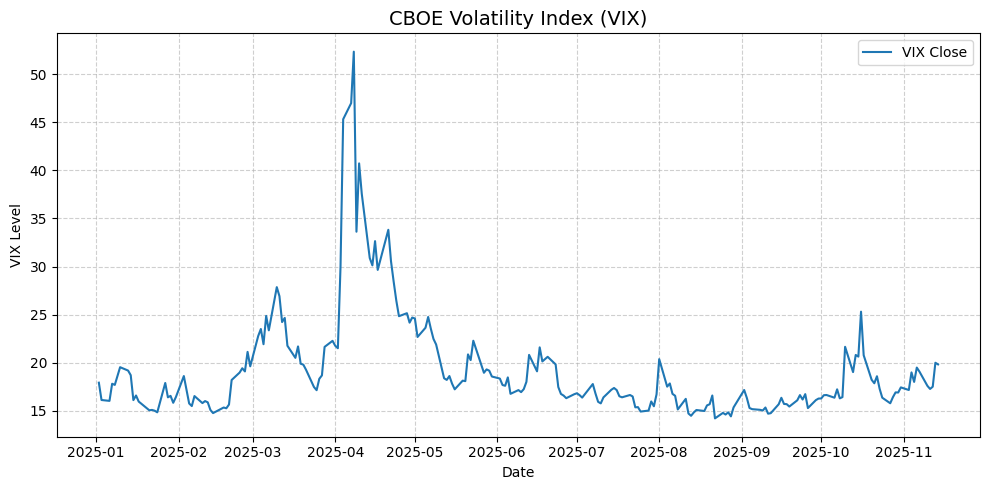

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download VIX data (symbol: ^VIX)
vix = yf.download("^VIX", start="2025-01-01", progress=False)

# Inspect columns
# print(vix.head())

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(vix.index, vix["Close"], label="VIX Close", linewidth=1.5)
plt.title("CBOE Volatility Index (VIX)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
!pip install pandas_market_calendars


In [37]:
import pandas_market_calendars as mcal

nyse = mcal.get_calendar('NYSE')
#schedule = nyse.schedule(start_date='2025-01-13', end_date='2025-02-01')
trading_days = nyse.valid_days(start_date='2025-02-05', end_date='2025-02-09')

print("Number of NYSE trading days:", len(trading_days))
#print("Number of NYSE trading days:", schedule)


Number of NYSE trading days: 3


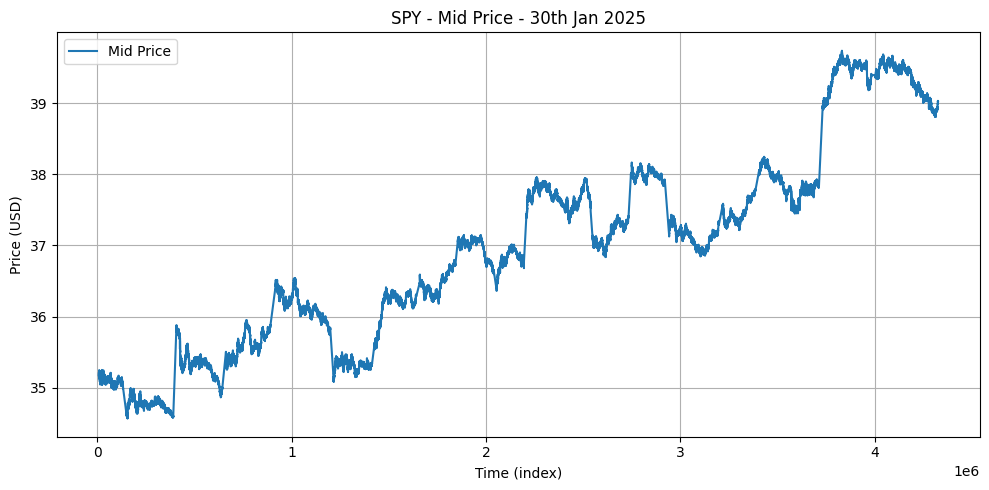

In [38]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 5))

plt.plot(df_market_l10['mid_price'], label='Mid Price')
#plt.plot(df_market_l10['L1-BidPrice'], label='L1 Bid Price')
#plt.plot(df_market_l10['L1-AskPrice'], label='L1 Ask Price')

plt.title('SPY - Mid Price - 30th Jan 2025')
plt.xlabel('Time (index)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [39]:
df_market_l10[~df_market_l10.isna().any(axis=1)].to_csv("data/etf/jan2025/cleaned/gdx_cleaned_jan2025.csv", index=False)